# Clustering + TSNE en MNIST

In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

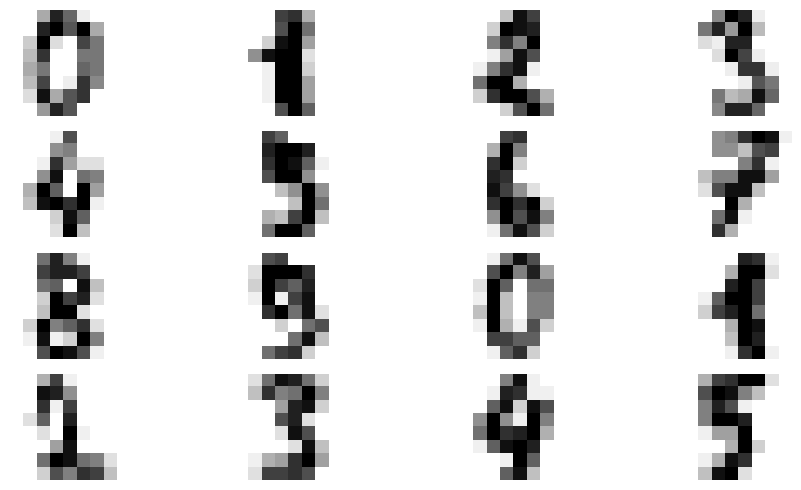

In [7]:
digits = load_digits()

#Invertir colores de las imagenes
def invertir_colores(images):
    return 16 - images

inverted_images = invertir_colores(digits.images)

#Imágenes originales
plt.gray()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 5))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.matshow(inverted_images[i])
    ax.axis('off') 

plt.tight_layout()
plt.show()

In [11]:
scaler = MinMaxScaler()
imagenes_normalizadas = scaler.fit_transform(digits.data)

In [12]:
# Clustering con K-Means
kmeans = KMeans(n_clusters=10, n_init=20)
clusters = kmeans.fit_predict(imagenes_normalizadas)

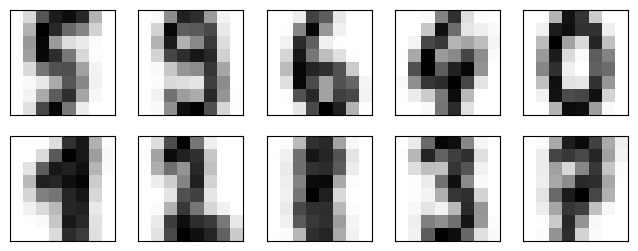

In [13]:
# Visualizar los centroides de los clusters como imágenes
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for i, axi in enumerate(ax.flat):
    axi.set(xticks=[], yticks=[])
    axi.imshow(kmeans.cluster_centers_[i].reshape(8, 8), interpolation='nearest', cmap=plt.cm.binary)
plt.show()


In [14]:
silhouette_avg = silhouette_score(imagenes_normalizadas, clusters)
davies_bouldin_index = davies_bouldin_score(imagenes_normalizadas, clusters)
print(f'Puntuación de la silueta: {silhouette_avg}')
print(f'Índice Davies-Bouldin: {davies_bouldin_index}')

Puntuación de la silueta: 0.18104434631744834
Índice Davies-Bouldin: 1.9259143073595038


In [17]:
# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(imagenes_normalizadas)

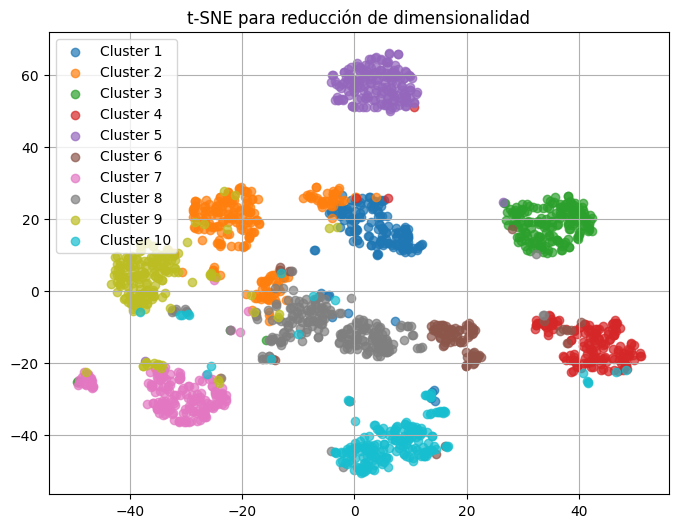

In [20]:
# Puntos reducidos con colores para cada cluster
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(tsne_result[clusters == i, 0], tsne_result[clusters == i, 1], label=f'Cluster {i+1}', alpha=0.7)
plt.title('t-SNE para reducción de dimensionalidad')
plt.legend()
plt.grid(True)
plt.show()

## Análisis

Para realizar esta actividad primeramente se tuvo que invertir los colores de las imágenes para que el fondo fuera blanco y los números de color negro como se muestran en la visualización.

Para realizar los siguientes pasos se hizo una normalización mediante máximos y mínimos. La razón por la que se optó por esta normalización es que después de probar con varias diferentes y también con los datos sin normalizar los scores de puntuación de silueta e índice Davies-Bouldin fueron ligeramente mayores.

Posteriormente se realizó k-means y el TSNE de manera normal.

Se notó que al normalizar los datos en la gráfica los clusters se veían más densos y con mejor separación pero se parecían menos a la gráfica original. Cuando no se normalizaban la gráfica se parecía más pero la densidad de clusters era menor